<a href="https://colab.research.google.com/github/learning-botman/Analyzing-Data-with-Pandas-and-Visualizing-Results-with-Matplotlib/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv
User uploaded file "winequality-red.csv" with length 84199 bytes
User uploaded file "winequality-white.csv" with length 264426 bytes


 Task 1: Load and Explore the Dataset

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Step 2: Mount Google Drive (if files are stored there)
# from google.colab import drive
# drive.mount('/content/drive')

# Step 3: Load datasets (change path if files are in Google Drive)
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

# Step 4: Display first few rows
print("🔴 Red Wine Sample:")
print(red_df.head())

print("\n⚪ White Wine Sample:")
print(white_df.head())

# Step 5: Check data types and missing values
print("\nRed Wine Info:")
print(red_df.info())

print("\nWhite Wine Info:")
print(white_df.info())

# Step 6: Check for missing values
print("\nMissing values in Red Wine:")
print(red_df.isnull().sum())

print("\nMissing values in White Wine:")
print(white_df.isnull().sum())

# Optional: Clean missing values (not needed here since no missing data)
# red_df.dropna(inplace=True)
# white_df.dropna(inplace=True)


🔴 Red Wine Sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2

Task 2: Basic Data Analysis

In [3]:
# Step 1: Basic statistics
print("📊 Red Wine Statistics:")
print(red_df.describe())

print("\n📊 White Wine Statistics:")
print(white_df.describe())

# Step 2: Group by quality and compute mean
print("\nRed Wine Mean by Quality:")
print(red_df.groupby('quality').mean())

print("\nWhite Wine Mean by Quality:")
print(white_df.groupby('quality').mean())

# Step 3: Identify any trends
# (You can look at alcohol, acidity, etc. vs. quality in the print output)


📊 Red Wine Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000       

Task 3: Data Visualization

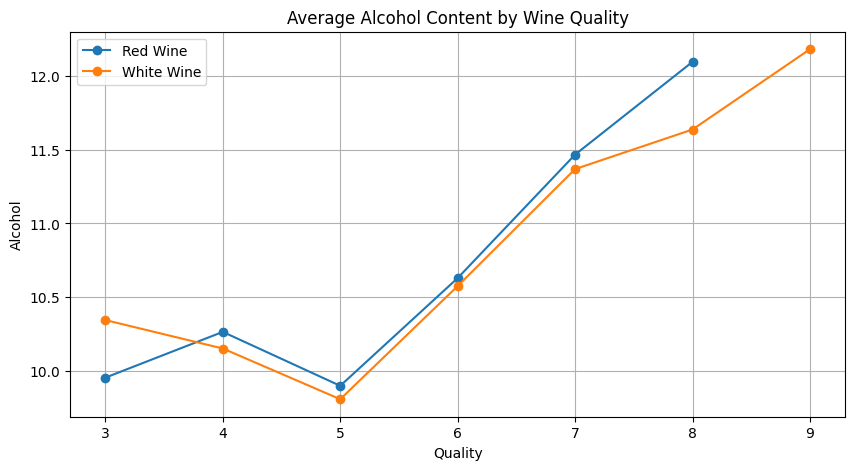

/tmp/ipython-input-940773252.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y='pH', data=red_df, ci=None)


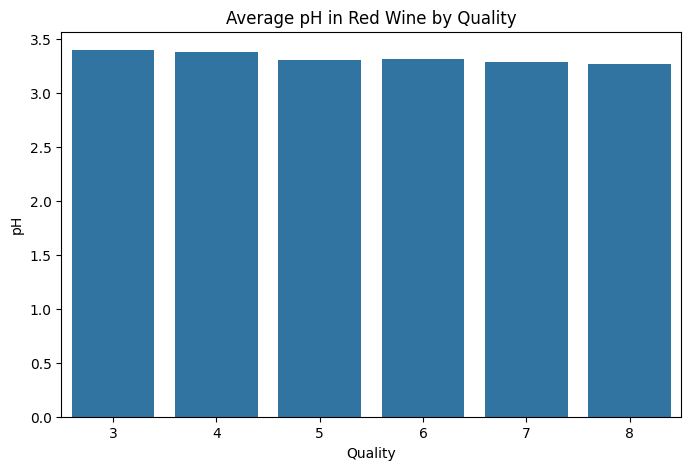

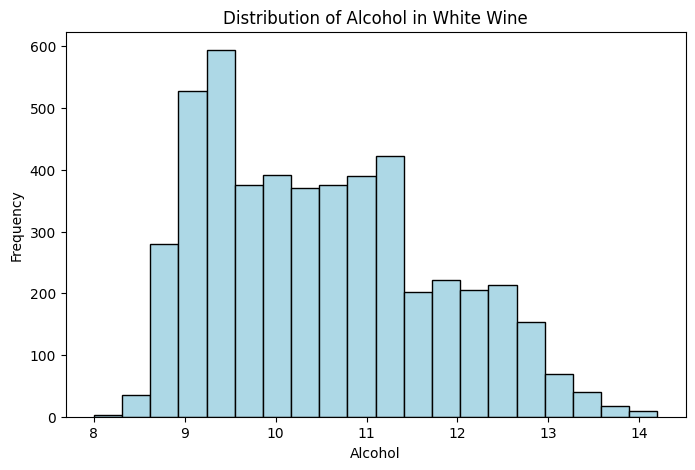

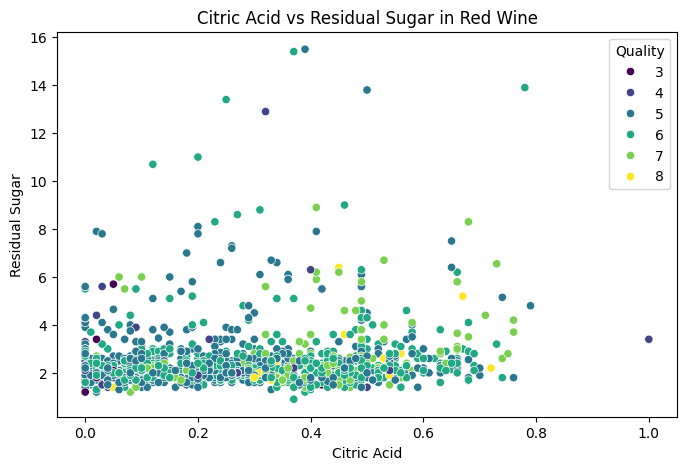

In [4]:
# Step 1: Line Chart (e.g., average alcohol per wine quality)
avg_alcohol_red = red_df.groupby('quality')['alcohol'].mean()
avg_alcohol_white = white_df.groupby('quality')['alcohol'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_alcohol_red.index, avg_alcohol_red.values, label='Red Wine', marker='o')
plt.plot(avg_alcohol_white.index, avg_alcohol_white.values, label='White Wine', marker='o')
plt.title("Average Alcohol Content by Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Bar Chart (e.g., average pH by quality)
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='pH', data=red_df, ci=None)
plt.title("Average pH in Red Wine by Quality")
plt.xlabel("Quality")
plt.ylabel("pH")
plt.show()

# Step 3: Histogram (e.g., alcohol distribution in white wine)
plt.figure(figsize=(8,5))
plt.hist(white_df['alcohol'], bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Alcohol in White Wine")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

# Step 4: Scatter Plot (e.g., citric acid vs residual sugar)
plt.figure(figsize=(8,5))
sns.scatterplot(data=red_df, x='citric acid', y='residual sugar', hue='quality', palette='viridis')
plt.title("Citric Acid vs Residual Sugar in Red Wine")
plt.xlabel("Citric Acid")
plt.ylabel("Residual Sugar")
plt.legend(title='Quality')
plt.show()
